In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits

In [2]:
from aplpy import FITSFigure
from astropy.io.fits import PrimaryHDU
import astropy.units as u

import matplotlib as mpl
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

In [ ]:
# from os import listdir

# fls = listdir('data_files_prev_works/masks_anika')
# fls = [i for i in fls if 'rgrd.fits' in i]

# msk_regs = {ms[:-10] : fits.getdata('data_files_prev_works/masks_anika/'+ms) for ms in fls}

In [ ]:
# coh_core_bndry_fle = 'data_files_prev_works/coherent_core_bound_SD.fits'


In [3]:
def aplpy_plot(fig= None, fgsz=(7,7), data=None, hd=None, cmap='inferno', vmin=9.7, vmax=10.7, vmid=None, 
               colourscale_stretch='linear', colourbar=True, colourbar_text=r'$\rm{v_{LSR}}\ (km\,s^{-1})$', 
               colourbar_loc='right', beam_colour='green', bm_clr='k', x_bm_lbl=0.07, y_bm_lbl=0.07, 
               scalebar_corner='top right', background_grey=False, bckgr_gr_clr='0.8', zoom=False, 
               sbplt=[0, 0, 1, 1], contours=False, contour_clr='k', beam=True) :
    """ 
    return aplpy FITSfigure for given data
    
    fig                 : matplotlib figure instance. If not given, a new figure is created
    fgsz                : size of the figure, if created new. Default is (7,7)
    
    data                : 2d array containing the data to be plotted, required
    hd                  : associated header, required
    
    cmap                : colourmap to be used. Default is 'inferno'
    vmin, vmax          : min,max of the colourscale. Default is (9.7, 10.7)
    vmid                : vmid for the colour scale. Required if the stretch is 'log'. Default is 'None'
    colourscale_stretch : stretch for the colour scale. Default is 'linear'
    
    colourbar           : bool. Whether the colourbar should be shown. Default is 'True'
    colourbar_text      : text accompanying the colourbar. Default is for v_lsr
    colourbar_loc       : location of the colourbar on the map. Default is 'right'
    
    beam_colour         : colour of the beam to be shown. Default is 'green'
    bm_clr              : colour of the text accompanying beam (the region name), default is k
    x_bm_lbl, y_bm_lbl  : position of the accompanying text (region name). Default is (0.07, 0.07)
    
    scalebar_corner     : position of the scale bar. Default is 'top right'
    
    background_grey     : whether to set background NaN to a different colour instead of the default white. 
                         Default is 'False'
    bckgr_gr_clr        : colour of the background NaN. Default is '0.8'
    
    
    zoom                : ff set to 'True', the figure shows a zoomed-in view of the B5 core. Default is 'False'
    
    sbplt               : which subplot to use. Only used if an existing figure is passed. Default is [0, 0, 1, 1] 
    
    contours            : whether to show the contours of the different regions (filaments 1 & 2, 
                          condensations 1, 2 & 3). Default is False
    contour_clr         : colour of the region contours, default is black
    """

    # generate a new matplotlib figure if one is not provided
    if not fig:
        fig = plt.figure(figsize=fgsz)

    # create an aplpy.FITSfigure with given data and header
    fig = FITSFigure( data=PrimaryHDU(data=data, header=hd), figure=fig, subplot=sbplt)
    
    # set background colour to the one given
    if background_grey:
        cmap = plt.get_cmap(cmap)
        cmap.set_bad(bckgr_gr_clr)

    # show the colour map 
    fig.show_colorscale( cmap=cmap, vmin=vmin, vmax=vmax,stretch=colourscale_stretch, vmid=vmid)
    
    # set coloud bar instance
    if colourbar:
        fig.add_colorbar()
        fig.colorbar.show(location=colourbar_loc, axis_label_text=colourbar_text)
    
    # add beam
    if beam:
        fig.add_beam(color=beam_colour)
    
    # add scalebar at a distance of 302 pc (for B5)
    distance = 302 *u.pc
    scale=(0.1*u.pc/distance*u.rad).to(u.deg)
    fig.add_scalebar(scale, label='0.1 pc', corner=scalebar_corner)
#     fig.set_nan_color('0.7')
    fig.ticks.set_color('black')
    
    # write name of the region : B5
    fig.add_label( x_bm_lbl, y_bm_lbl, 'NGC1333', relative=True, color= bm_clr, size=15)
    
    # zoom around the core
#     if zoom:
#         fig.recenter(56.914, 32.879, width=0.13, height=0.138)

    # show contours of filament 1, filament 2, condensation 1, condensation 2 and condensation 3
#     if contours :
#         fig.show_contour(msk_regs['fil1'], colors=[contour_clr], levels=[0])
#         fig.show_contour(msk_regs['fil2'], colors=[contour_clr], levels=[0])

#         fig.show_contour(msk_regs['cnd1'], colors=[contour_clr], levels=[0], linestyles='dashed')
#         fig.show_contour(msk_regs['cnd2'], colors=[contour_clr], levels=[0], linestyles='dashed')
#         fig.show_contour(msk_regs['cnd3'], colors=[contour_clr], levels=[0], linestyles='dashed')
    
    return fig

# $^{13}$CO

In [4]:
data_dir = 'datacubes/'

In [6]:
# data_13CO, hd_13CO = fits.getdata(data_dir + '13CO_NGC1333_mosaic_20250205.fit', header=True)
data_13CO, hd_13CO = fits.getdata(data_dir + 'NGC1333_13CO_simpl_header.fits', header=True)

In [7]:
# freq_13CO_21 = 220.39870056

# hd_13CO['bmaj'] =  (5.73 + (14.68*230/freq_13CO_21)) / 3600.
# hd_13CO['bmin'] =  (5.73 + (14.68*230/freq_13CO_21)) / 3600.
# hd_13CO['bpa'] = 0.0

In [7]:
moment0_13CO = np.nansum(data_13CO, axis=0) * np.abs(hd_13CO['cdelt3'])

In [8]:
moment0_13CO[moment0_13CO == 0] = np.nan

In [9]:
# hd_13CO

In [8]:
hd2d_13CO = hd_13CO.copy()

hd2d_13CO['naxis'] = 2
hd2d_13CO['wcsaxes'] = 2


for it in ['naxis3', 'crpix3', 'crval3', 'ctype3', 'cdelt3', 'cunit3']:
    hd2d_13CO.remove(it)
    
# hd2d_13CO.remove('history', remove_all=True)

In [12]:
# hd2d_13CO

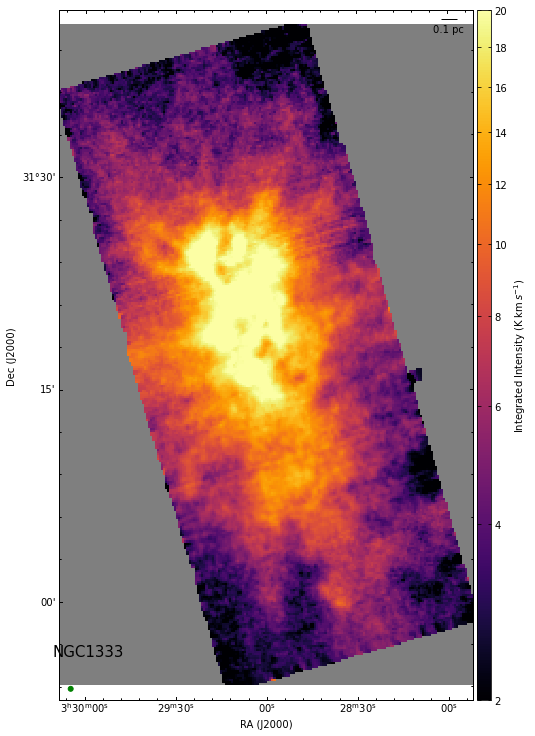

In [13]:
fig = aplpy_plot(data=moment0_13CO, hd=hd2d_13CO, cmap='inferno', zoom=True, fgsz=(6,10), vmin=2, vmax=20, vmid=-2, 
                 contours=True, contour_clr='k', background_grey=True, bckgr_gr_clr='0.5', 
                 colourbar_text=r'Integrated Intensity (K km$\,s^{-1}$)', colourscale_stretch='log')


# fig.savefig('plots/mom0_sel-chan_w-labels.pdf', dpi=1000)

# C$^{18}$O

In [9]:
# data_C18O, hd_C18O = fits.getdata(data_dir + 'C18O_NGC1333_mosaic_20250205.fit', header=True)
data_C18O, hd_C18O = fits.getdata(data_dir + 'NGC1333_C18O_simpl_header.fits', header=True)

In [10]:
# freq_C18O_21 = 219.560357

# hd_C18O['bmaj'] =  (5.73 + (14.68*230/freq_C18O_21)) / 3600.
# hd_C18O['bmin'] =  (5.73 + (14.68*230/freq_C18O_21)) / 3600.
# hd_C18O['bpa'] = 0.0

In [16]:
moment0_C18O = np.nansum(data_C18O, axis=0) * np.abs(hd_C18O['cdelt3'])

In [17]:
moment0_C18O[moment0_C18O == 0] = np.nan

In [28]:
# hd_C18O

In [31]:
# hd_C18O['cdelt3']/freq_C18O_21*299792458/1000

In [32]:
# moment0_C18O = np.nansum(data_combi_C18O, axis=0) * np.abs(hd_C18O['cdelt3'])

In [33]:
# np.abs(hd_C18O['cdelt3']), np.abs(hd_13CO['cdelt3'])

In [11]:
hd2d_C18O = hd_C18O.copy()

hd2d_C18O['naxis'] = 2
hd2d_C18O['wcsaxes'] = 2

for it in ['naxis3', 'crpix3', 'crval3', 'ctype3', 'cdelt3', 'cunit3']:
    hd2d_C18O.remove(it)
    
# hd2d_C18O.remove('history', remove_all=True)

In [19]:
# hd2d_C18O

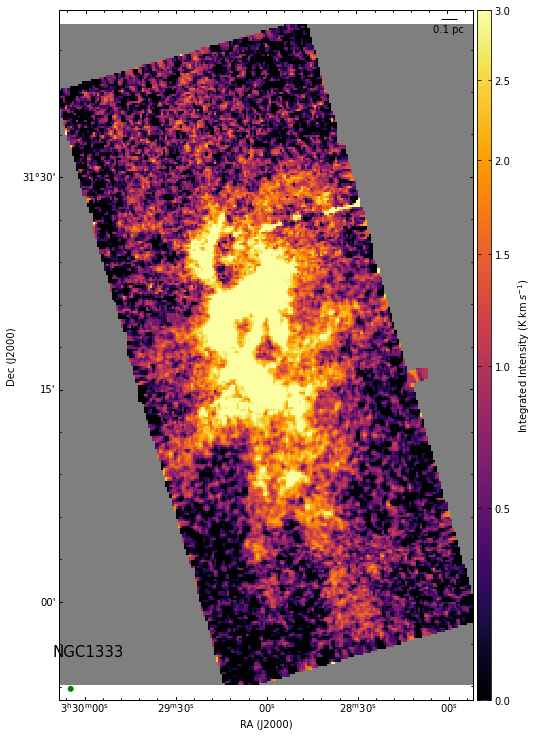

In [20]:
fig = aplpy_plot(data=moment0_C18O, hd=hd2d_C18O, cmap='inferno', zoom=True, fgsz=(6,10), vmin=0, vmax=3, vmid=-2, 
                 contours=True, contour_clr='k', background_grey=True, bckgr_gr_clr='0.5', 
                 colourbar_text=r'Integrated Intensity (K km$\,s^{-1}$)', colourscale_stretch='log')


# fig.savefig('plots/mom0_sel-chan_w-labels.pdf', dpi=1000)

21.108003780527646

# Parameter Maps

In [23]:
fitcube_13CO = fits.getdata(data_dir + "13CO_fitcube.fits")
fitcube_C18O = fits.getdata(data_dir + "C18O_fitcube.fits")

## $\rm ^{13}CO $

## Peak brightness

Set OBSGEO-B to    19.822798 from OBSGEO-[XYZ].
Set OBSGEO-H to     4117.025 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


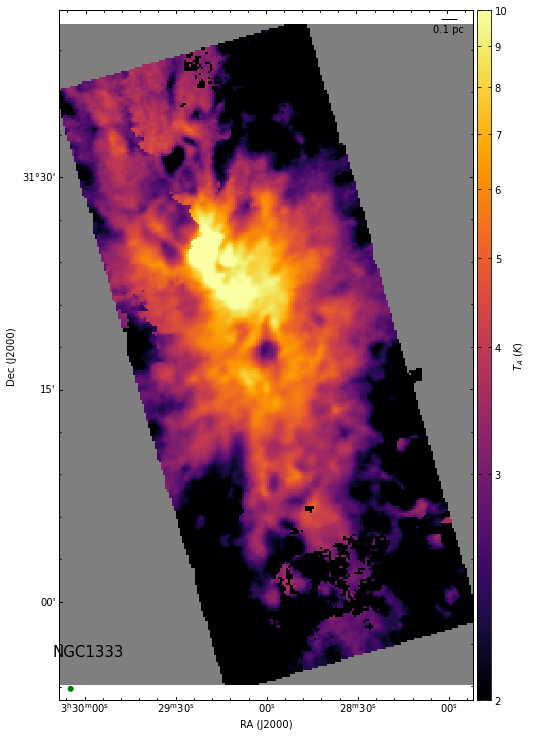

In [37]:
fig = aplpy_plot(data=fitcube_13CO[0, :, :], hd=hd2d_C18O, cmap='inferno', zoom=True, fgsz=(6,10), vmin=2, 
                 vmax=10, vmid=1, contours=True, contour_clr='k', background_grey=True, bckgr_gr_clr='0.5', 
                 colourbar_text=r'$T_{A}\ (K)$', colourscale_stretch='log')

## Velocity

In [46]:
vel_13CO = fitcube_13CO[1, :, :]

vel_13CO[fitcube_13CO[4, :, :]>0.1] = np.nan

Set OBSGEO-B to    19.822798 from OBSGEO-[XYZ].
Set OBSGEO-H to     4117.025 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


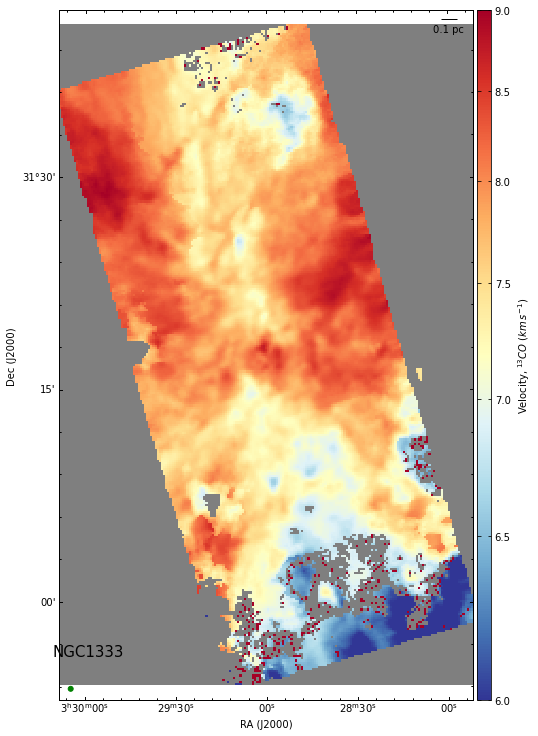

In [48]:
fig = aplpy_plot(data=vel_13CO, hd=hd2d_C18O, cmap='RdYlBu_r', zoom=True, fgsz=(6,10), vmin=6, 
                 vmax=9, vmid=-2, contours=True, contour_clr='k', background_grey=True, bckgr_gr_clr='0.5', 
                 colourbar_text=r'Velocity, ${}^{13}CO\ (km\,s^{-1})$', colourscale_stretch='log')

## Velocity dispersion

In [59]:
sig_13CO = fitcube_13CO[2, :, :]

sig_13CO[fitcube_13CO[5, :, :]>1] = np.nan

# plt.imshow(fitcube_13CO[5, :, :]>=1, origin='lower')

Set OBSGEO-B to    19.822798 from OBSGEO-[XYZ].
Set OBSGEO-H to     4117.025 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


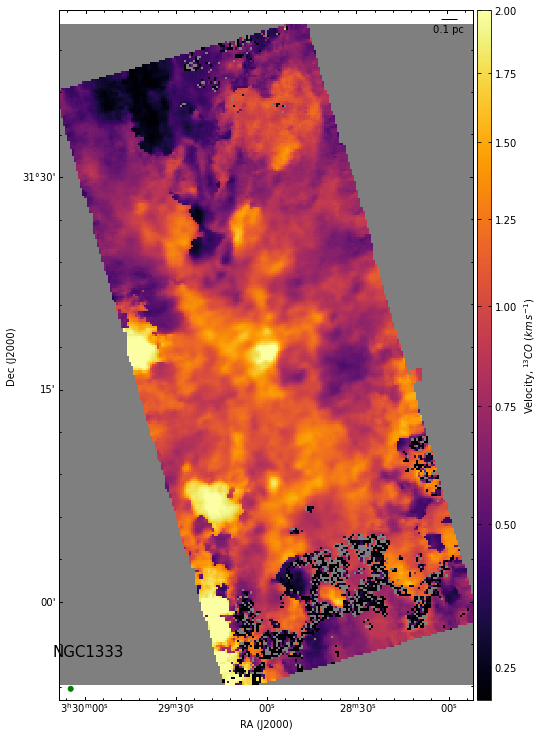

In [62]:
fig = aplpy_plot(data=sig_13CO, hd=hd2d_C18O, cmap='inferno', zoom=True, fgsz=(6,10), vmin=0.2, 
                 vmax=2, vmid=-2, contours=True, contour_clr='k', background_grey=True, bckgr_gr_clr='0.5', 
                 colourbar_text=r'Velocity, ${}^{13}CO\ (km\,s^{-1})$', colourscale_stretch='log')



## $\rm C^{18}O $

## Peak brightness

Set OBSGEO-B to    19.822798 from OBSGEO-[XYZ].
Set OBSGEO-H to     4117.025 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


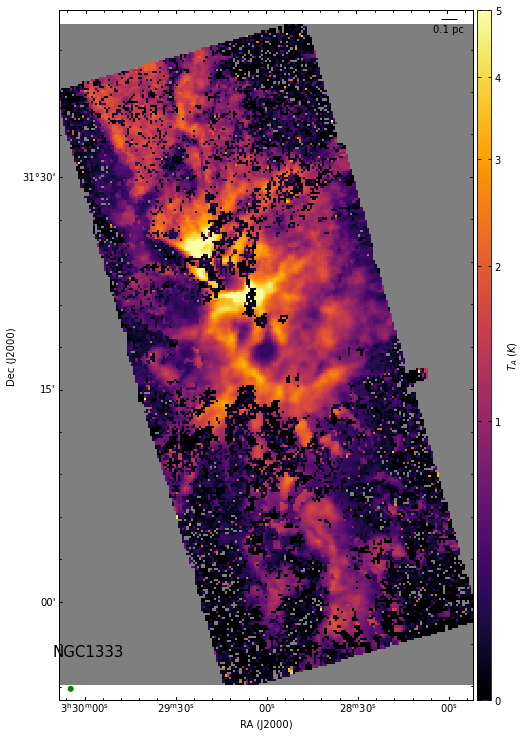

In [67]:
fig = aplpy_plot(data=fitcube_C18O[0, :, :], hd=hd2d_C18O, cmap='inferno', zoom=True, fgsz=(6,10), vmin=0, 
                 vmax=5, vmid=-1, contours=True, contour_clr='k', background_grey=True, bckgr_gr_clr='0.5', 
                 colourbar_text=r'$T_{A}\ (K)$', colourscale_stretch='log')

## Velocity

In [72]:
vel_C18O = fitcube_C18O[1, :, :]

vel_C18O[fitcube_C18O[4, :, :]>0.1] = np.nan

Set OBSGEO-B to    19.822798 from OBSGEO-[XYZ].
Set OBSGEO-H to     4117.025 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


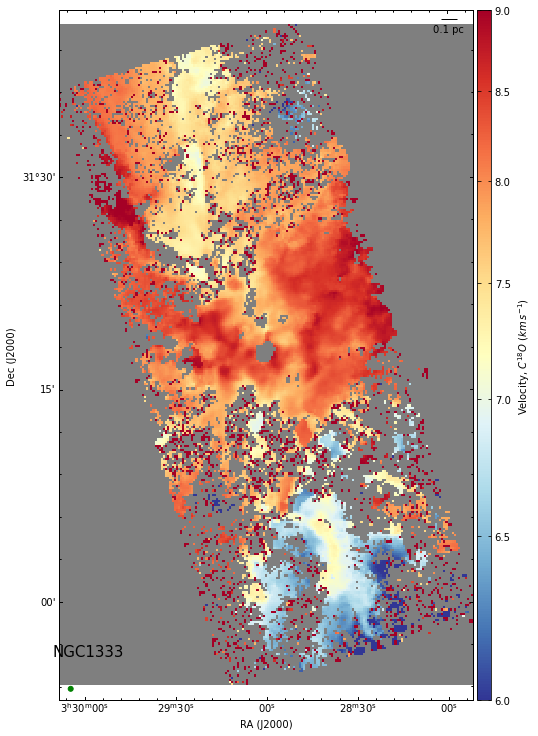

In [73]:
fig = aplpy_plot(data=vel_C18O, hd=hd2d_C18O, cmap='RdYlBu_r', zoom=True, fgsz=(6,10), vmin=6, 
                 vmax=9, vmid=-2, contours=True, contour_clr='k', background_grey=True, bckgr_gr_clr='0.5', 
                 colourbar_text=r'Velocity, ${}C^{18}O\ (km\,s^{-1})$', colourscale_stretch='log')

## Velocity dispersion

In [74]:
sig_C18O = fitcube_C18O[2, :, :]

sig_C18O[fitcube_C18O[5, :, :]>1] = np.nan

# plt.imshow(fitcube_C18O[5, :, :]>=1, origin='lower')

Set OBSGEO-B to    19.822798 from OBSGEO-[XYZ].
Set OBSGEO-H to     4117.025 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


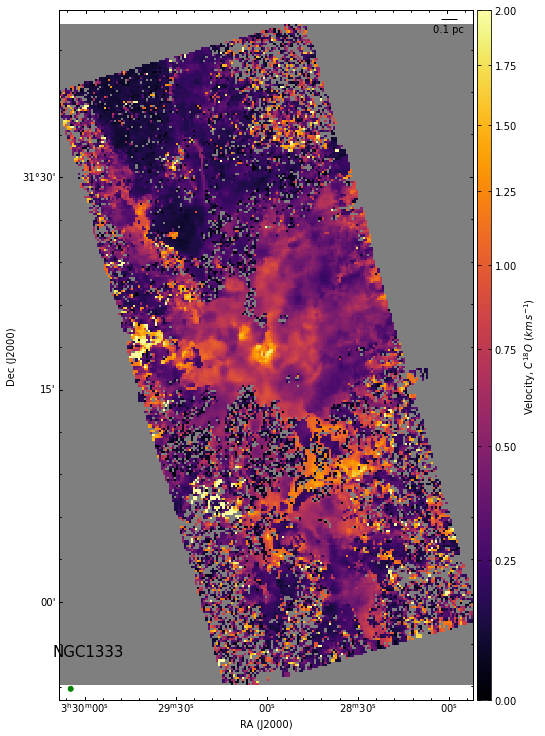

In [76]:
fig = aplpy_plot(data=sig_C18O, hd=hd2d_C18O, cmap='inferno', zoom=True, fgsz=(6,10), vmin=0, 
                 vmax=2, vmid=-2, contours=True, contour_clr='k', background_grey=True, bckgr_gr_clr='0.5', 
                 colourbar_text=r'Velocity, ${}C^{18}O\ (km\,s^{-1})$', colourscale_stretch='log')



## moment maps

In [12]:
from spectral_cube import SpectralCube

In [13]:
# cube_13CO = SpectralCube.read(data_dir + '13CO_NGC1333_mosaic_20250205.fit')
# cube_C18O = SpectralCube.read(data_dir + 'C18O_NGC1333_mosaic_20250205.fit')

In [14]:
cube_13CO = SpectralCube.read(data_dir + 'NGC1333_13CO_simpl_header.fits')
cube_C18O = SpectralCube.read(data_dir + 'NGC1333_C18O_simpl_header.fits')

#### compute moments

In [26]:
import astropy.units as u

In [28]:
subcube_13CO = cube_13CO.spectral_slab(0*u.km/u.s, +20*u.km/u.s)
subcube_C18O = cube_C18O.spectral_slab(0*u.km/u.s, +20*u.km/u.s)

In [29]:
mom1_13CO = subcube_13CO.moment1().value
mom2_sig_13CO = subcube_13CO.linewidth_sigma().value

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/spectral_cube/_moments.py:168: RuntimeWarning: invalid value encountered in divide
  return (np.nansum(data * pix_cen, axis=axis) /


In [39]:
mom1_C18O = subcube_C18O.moment1().value
mom2_sig_C18O = subcube_C18O.linewidth_sigma().value

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/spectral_cube/_moments.py:168: RuntimeWarning: invalid value encountered in divide
  return (np.nansum(data * pix_cen, axis=axis) /


In [34]:
# mom1_13CO = fits.getdata('moment_maps/13CO_moment1.fits')
# mom2_13CO = fits.getdata('moment_maps/13CO_moment2.fits')

In [35]:
# mom1_C18O = fits.getdata('moment_maps/C18O_moment1.fits')
# mom2_C18O = fits.getdata('moment_maps/C18O_moment2.fits')

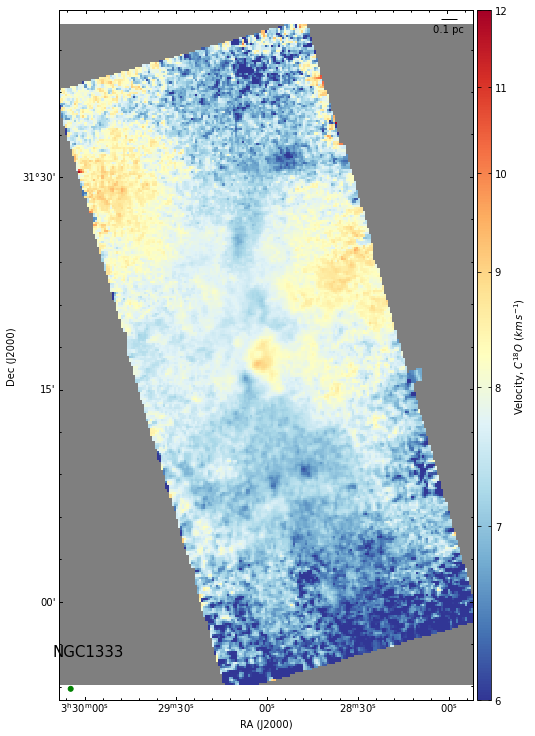

In [30]:
fig = aplpy_plot(data=mom1_13CO, hd=hd2d_13CO, cmap='RdYlBu_r', zoom=True, fgsz=(6,10), vmin=6, 
                 vmax=12, vmid=-2, contours=True, contour_clr='k', background_grey=True, bckgr_gr_clr='0.5', 
                 colourbar_text=r'Velocity, ${}C^{18}O\ (km\,s^{-1})$', colourscale_stretch='log')

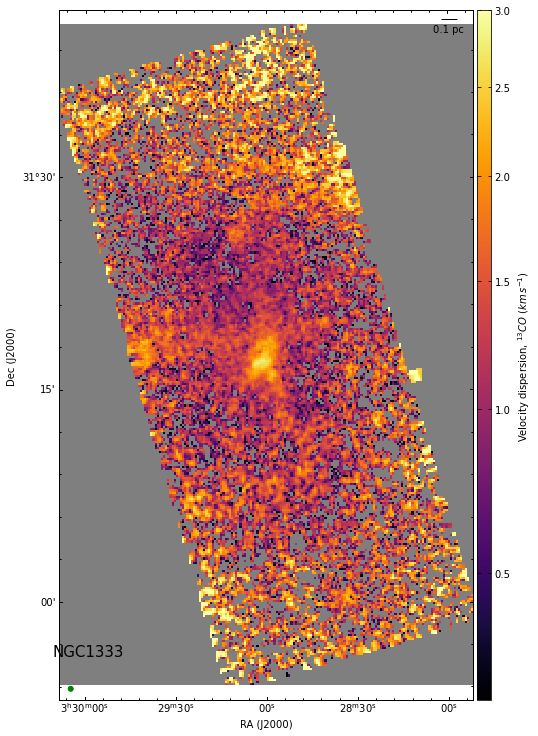

In [32]:
fig = aplpy_plot(data=mom2_sig_13CO, hd=hd2d_C18O, cmap='inferno', zoom=True, fgsz=(6,10), vmin=0.2, 
                 vmax=3, vmid=-2, contours=True, contour_clr='k', background_grey=True, bckgr_gr_clr='0.5', 
                 colourbar_text=r'Velocity dispersion, ${}^{13}CO\ (km\,s^{-1})$', colourscale_stretch='log')

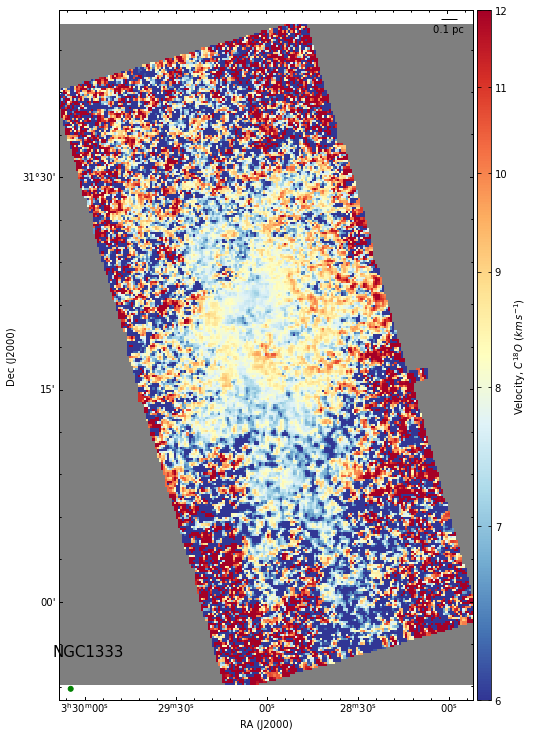

In [40]:
fig = aplpy_plot(data=mom1_C18O, hd=hd2d_C18O, cmap='RdYlBu_r', zoom=True, fgsz=(6,10), vmin=6, 
                 vmax=12, vmid=-2, contours=True, contour_clr='k', background_grey=True, bckgr_gr_clr='0.5', 
                 colourbar_text=r'Velocity, ${}C^{18}O\ (km\,s^{-1})$', colourscale_stretch='log')

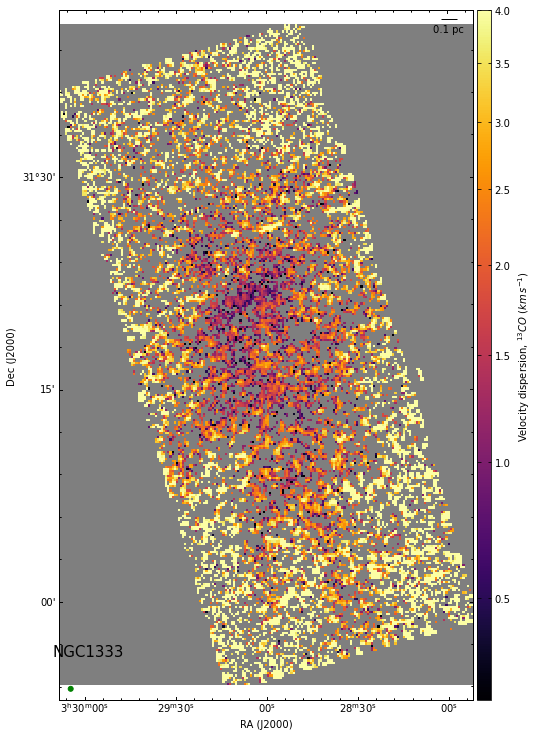

In [38]:
fig = aplpy_plot(data=mom2_sig_C18O, hd=hd2d_C18O, cmap='inferno', zoom=True, fgsz=(6,10), vmin=0.2, 
                 vmax=4, vmid=-2, contours=True, contour_clr='k', background_grey=True, bckgr_gr_clr='0.5', 
                 colourbar_text=r'Velocity dispersion, ${}^{13}CO\ (km\,s^{-1})$', colourscale_stretch='log')

## $\rm NH_3$ maps

In [46]:
GAS_data_dir = 'GAS_nh3_maps/'

In [47]:
vel_nh3, hd_nh3 = fits.getdata(GAS_data_dir + 'nh3_whole_2arcmin_Vlsr_flag_20p_resz.fits', header =True)
sig_nh3 = fits.getdata(GAS_data_dir + 'nh3_whole_2arcmin_Sigma_flag_20p_resz.fits')

In [54]:
data_nh3_11, hd_nh3_cube = fits.getdata(GAS_data_dir + 'nh3_11_whole_cube_2_arcmin.fits', header=True)

In [84]:
moment0_nh3 = np.nansum(data_nh3_11, axis=0) * ((np.abs(hd_nh3_cube['cdelt3'])/hd_nh3_cube['crval3'])*299792458/1000.)

In [85]:
moment0_nh3[moment0_nh3 == 0] = np.nan

In [99]:
hd_nh3['bmaj']

0.03333333333333333

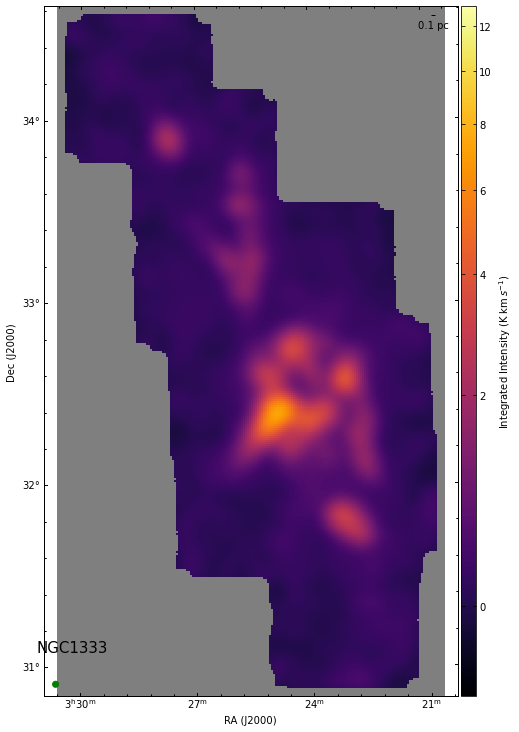

In [101]:
fig = aplpy_plot(data=moment0_nh3, hd=hd_nh3, cmap='inferno', zoom=True, fgsz=(6,10), vmin=-0.5, vmax=13, vmid=-2, 
                 contours=True, contour_clr='k', background_grey=True, bckgr_gr_clr='0.5', 
                 colourbar_text=r'Integrated Intensity (K km$\,s^{-1}$)', colourscale_stretch='log')


# fig.savefig('plots/mom0_sel-chan_w-labels.pdf', dpi=1000)

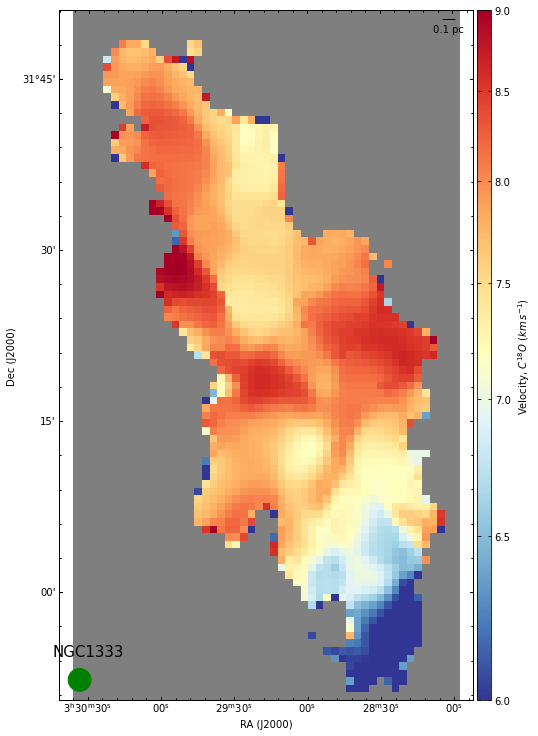

In [100]:
fig = aplpy_plot(data=vel_nh3, hd=hd_nh3, cmap='RdYlBu_r', zoom=True, fgsz=(6,10), vmin=6, 
                 vmax=9, vmid=-2, contours=True, contour_clr='k', background_grey=True, bckgr_gr_clr='0.5', 
                 colourbar_text=r'Velocity, ${}C^{18}O\ (km\,s^{-1})$', colourscale_stretch='log')

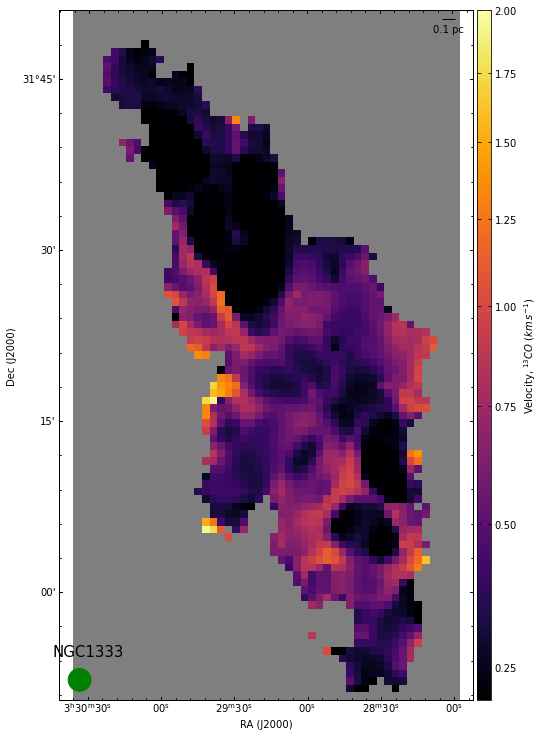

In [50]:
fig = aplpy_plot(data=sig_nh3, hd=hd_nh3, cmap='inferno', zoom=True, fgsz=(6,10), vmin=0.2, 
                 vmax=2, vmid=-2, contours=True, contour_clr='k', background_grey=True, bckgr_gr_clr='0.5', 
                 colourbar_text=r'Velocity, ${}^{13}CO\ (km\,s^{-1})$', colourscale_stretch='log')

In [7]:
vel_nh3_orig, hd_nh3_orig = fits.getdata('GAS_nh3_maps/NGC1333_Vlsr_DR1_rebase3_flag.fits', header=True)
sig_nh3_orig = fits.getdata('GAS_nh3_maps/NGC1333_Sigma_DR1_rebase3_flag.fits')

In [9]:
vel_nh3_orig[vel_nh3_orig==0] = np.nan
sig_nh3_orig[sig_nh3_orig==0] = np.nan

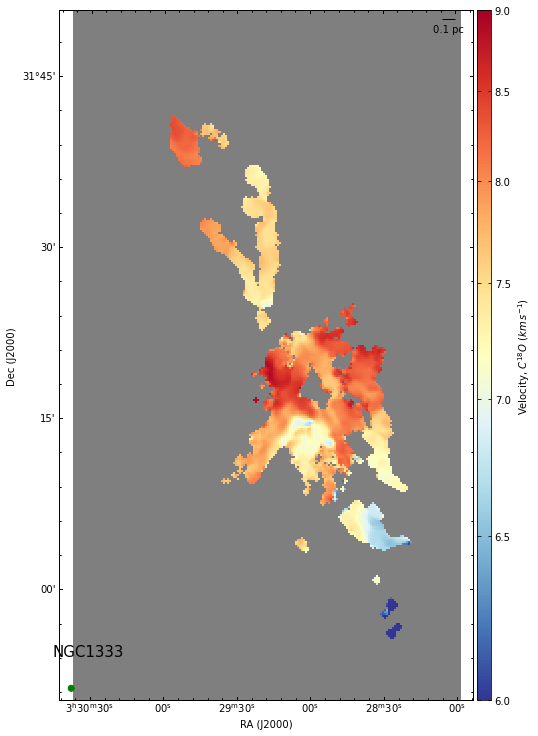

In [10]:
fig = aplpy_plot(data=vel_nh3_orig, hd=hd_nh3_orig, cmap='RdYlBu_r', zoom=True, fgsz=(6,10), vmin=6, 
                 vmax=9, vmid=-2, contours=True, contour_clr='k', background_grey=True, bckgr_gr_clr='0.5', 
                 colourbar_text=r'Velocity, ${}C^{18}O\ (km\,s^{-1})$', colourscale_stretch='log')

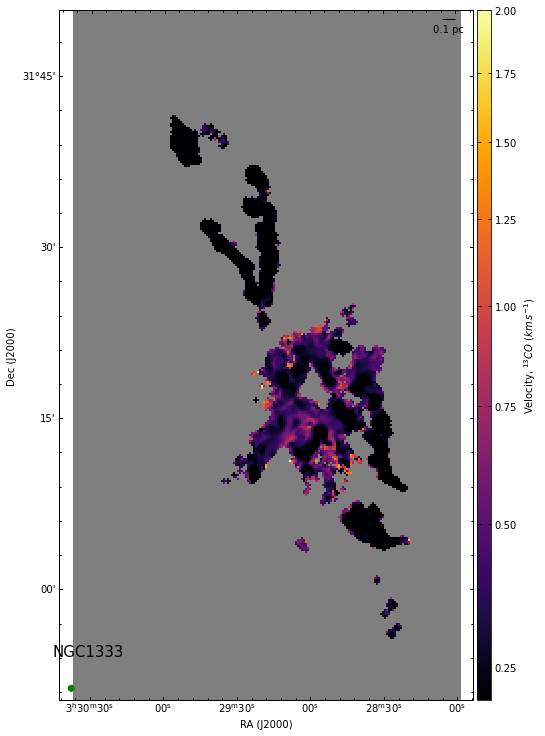

In [11]:
fig = aplpy_plot(data=sig_nh3_orig, hd=hd_nh3_orig, cmap='inferno', zoom=True, fgsz=(6,10), vmin=0.2, 
                 vmax=2, vmid=-2, contours=True, contour_clr='k', background_grey=True, bckgr_gr_clr='0.5', 
                 colourbar_text=r'Velocity, ${}^{13}CO\ (km\,s^{-1})$', colourscale_stretch='log')

In [20]:
h2col, hd_h2 = fits.getdata('HGBS_perseus_hires_column_density_map.fits', header=True)

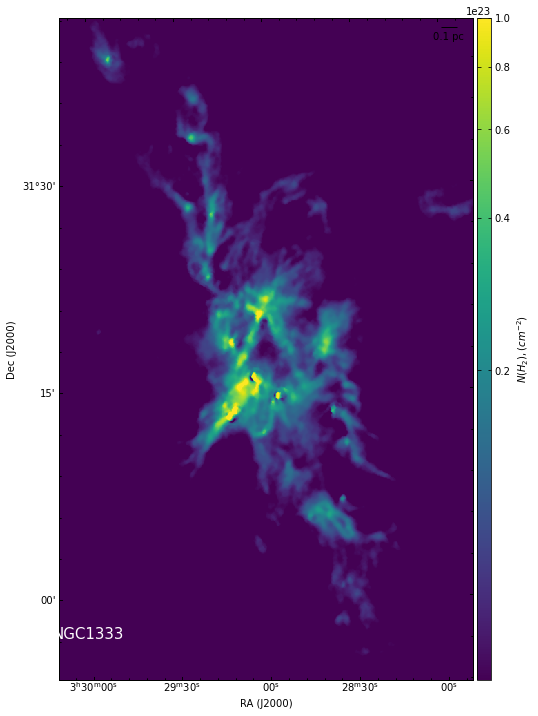

In [27]:
fig = aplpy_plot(data=h2col, hd=hd_h2, cmap='viridis', zoom=True, fgsz=(6,10), vmin=5e21, 
                 vmax=1e23, vmid=-2, contours=False, contour_clr='k', background_grey=True, bckgr_gr_clr='0.5', 
                 colourbar_text=r'$N(H_2), (cm^{-2})$', colourscale_stretch='log', beam=False, bm_clr='w')

fig.recenter(52.25, 31.3, width=0.50, height=0.8)

### Filament skeletons

In [5]:
skel_nh2, hd_nh2 = fits.getdata('filament_masks/skeleton_all_nh2.fits', header=True)
skel_nh3, hd_nh3 = fits.getdata('filament_masks/skeleton_all_nh3.fits', header=True)
skel_13CO, hd_13CO = fits.getdata('filament_masks/skeleton_all_13CO.fits', header=True)
skel_C18O, hd_C18O = fits.getdata('filament_masks/skeleton_all_C18O.fits', header=True)

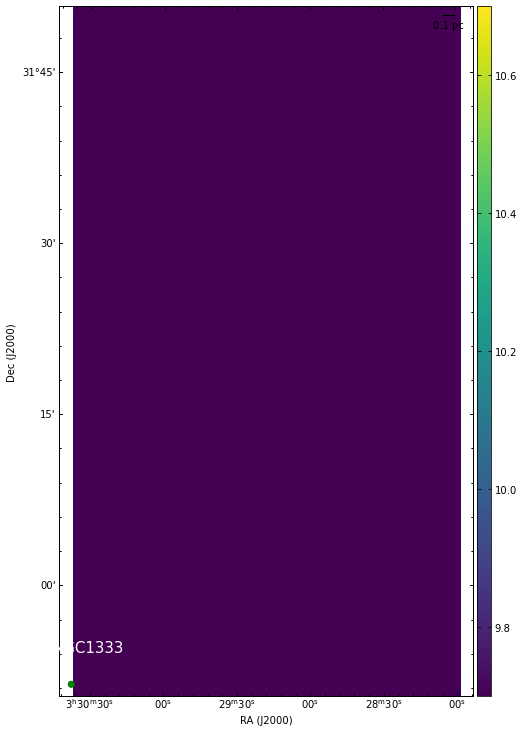

In [12]:
fig = aplpy_plot(data=skel_nh3, hd=hd_nh3, cmap='viridis', zoom=False, fgsz=(6,10), background_grey=True, 
                 bckgr_gr_clr='0.5', colourbar_text='', beam=True, bm_clr='w')

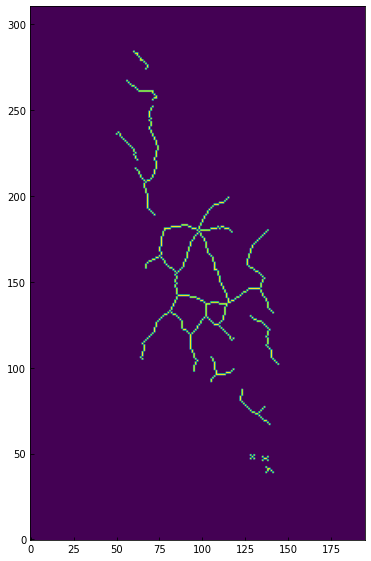

In [10]:
plt.figure(figsize=(6,10))
plt.imshow(skel_nh2, origin='lower')

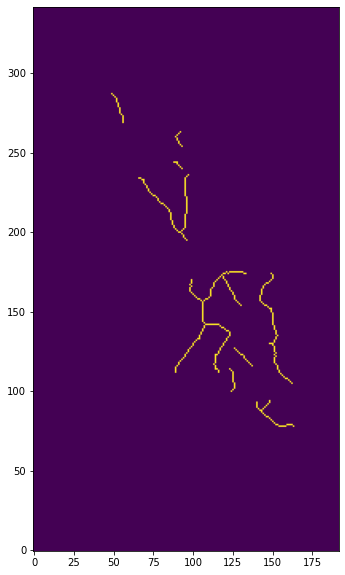

In [13]:
plt.figure(figsize=(6,10))
plt.imshow(skel_nh3, origin='lower')

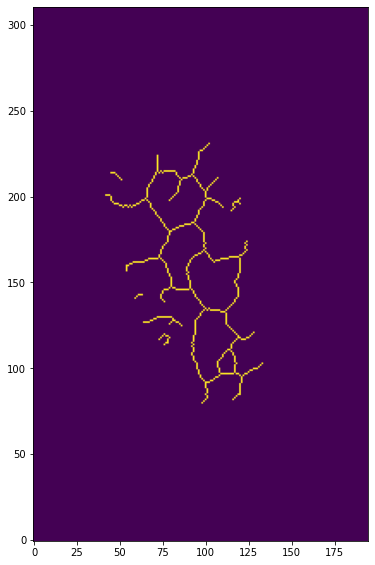

In [14]:
plt.figure(figsize=(6,10))
plt.imshow(skel_13CO, origin='lower')

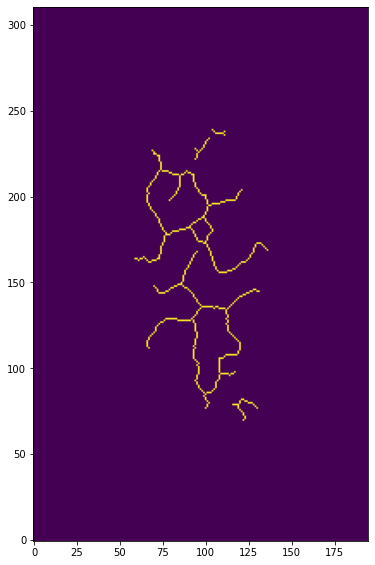

In [15]:
plt.figure(figsize=(6,10))
plt.imshow(skel_C18O, origin='lower')

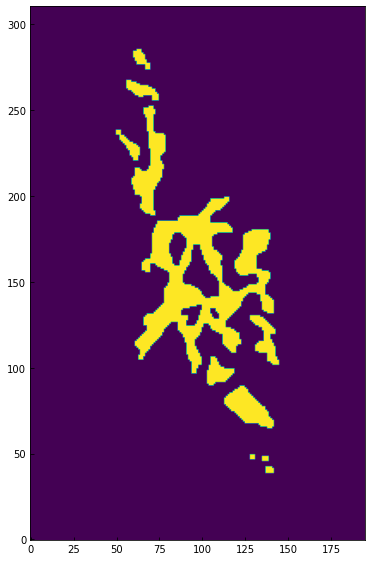

In [13]:
plt.figure(figsize=(6,10))
plt.imshow(fits.getdata('filament_masks/filament_masks_all.fits'), origin='lower')